# FCIM.M.IA - Artificial Intelligence

> **Lab 1:** Expert Systems \\
> **Performed by:** Trifan Denis, group TI-231M \\
> **Verified by:** Mihail Gavrilita, asist. univ.

## Imports and Utils

In [ ]:
from production import forward_chain, backward_chain
from utils import print_element_with_capital
from rules import FANTASY_RULES, INITIAL_TRUTHS, MID_AND_TRUTHS
import random

## Task 1 -- Define 5 types of tourists that visit Luna-City. Draw the Goal Tree representing these types of tourists.

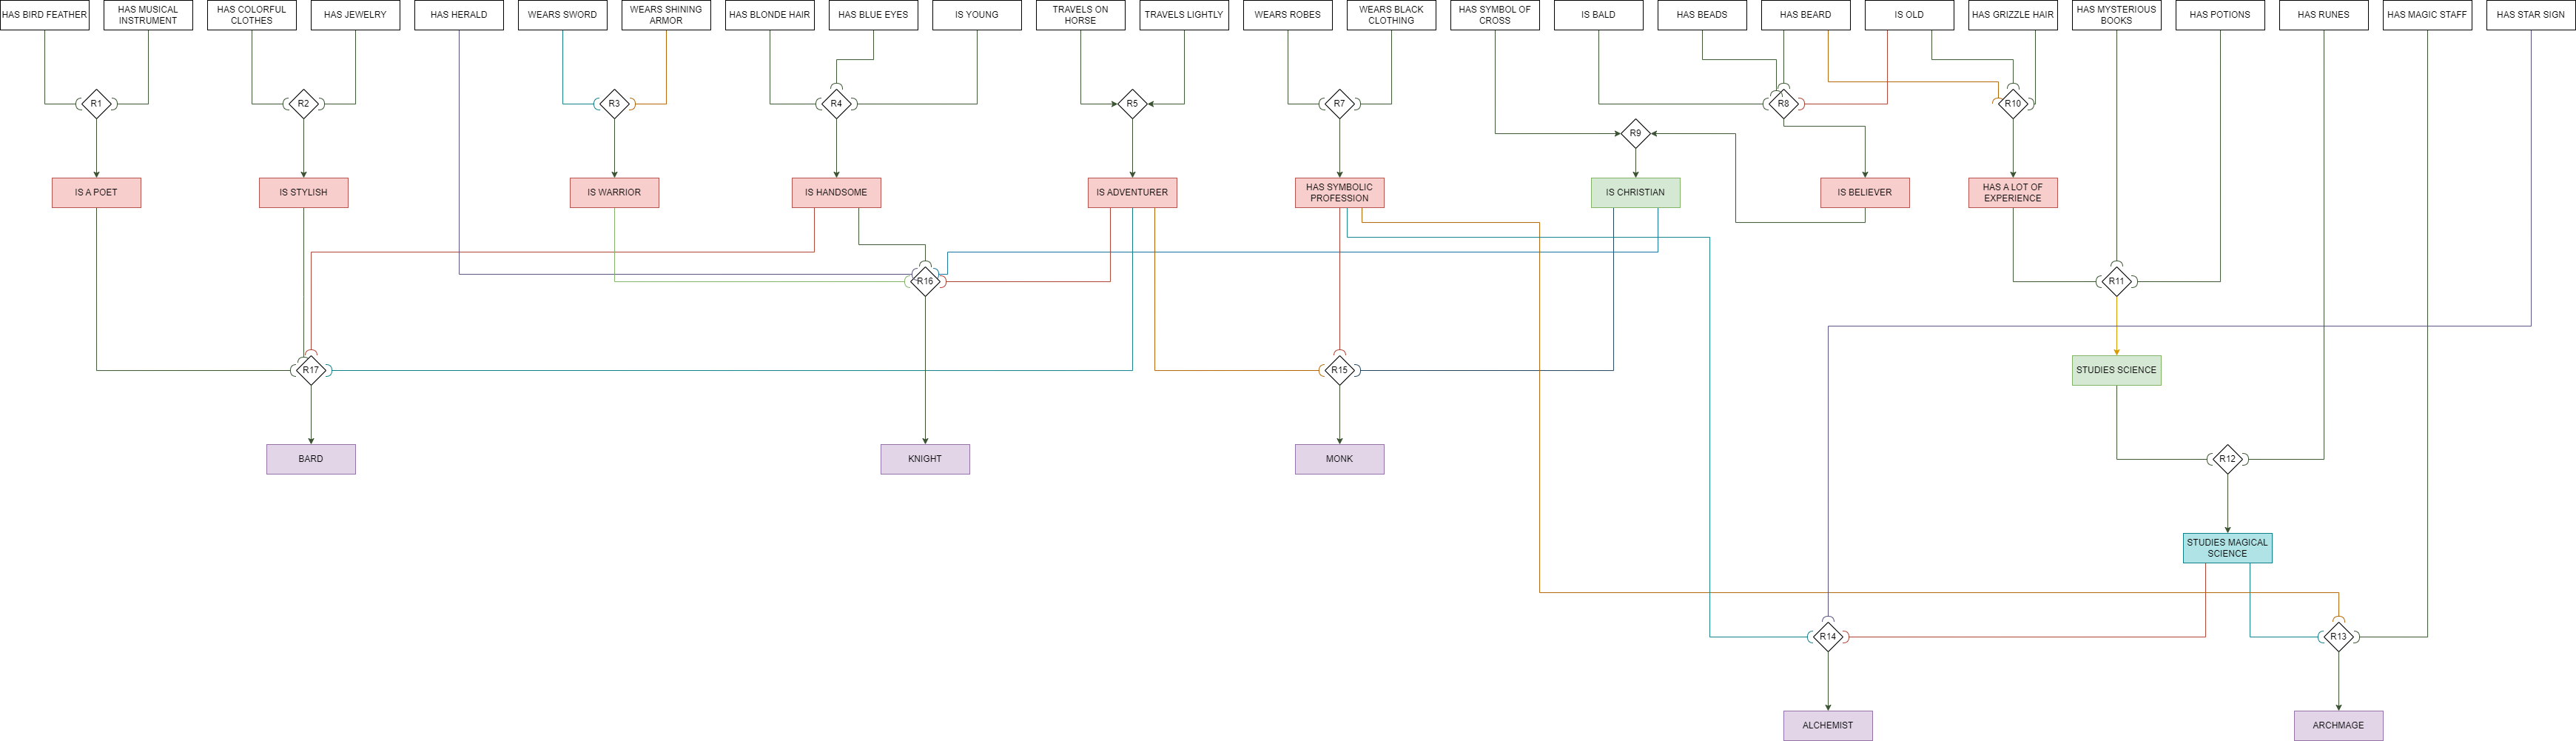

## Task 2 -- Implement the rules from the defined tree in Task 1 in your code (use the IF, AND, OR and THEN rules which are already implemented)

In [ ]:
FANTASY_RULES = (

    IF(AND('(?x) has bird feather',  # R1
           '(?x) has musical instrument'),
       THEN('(?x) is a poet')),

    IF(AND('(?x) has colorful clothes',  # R2
           '(?x) has jewelry'),
       THEN('(?x) is stylish')),

    IF(AND('(?x) wears sword',  # R3
           '(?x) wears shining armor'),
       THEN('(?x) is warrior')),

    IF(AND('(?x) has blonde hair',  # R4
           '(?x) has blue eyes',
           '(?x) is young'),
       THEN('(?x) is handsome')),

    IF(OR('(?x) travels on horse',  # R5
          '(?x) travels lightly'),
       THEN('(?x) is adventurer')),

    IF(AND('(?x) wears robes',  # R7
           '(?x) wears black clothing'),
       THEN('(?x) has symbolic profession')),

    IF(AND('(?x) is bald',  # R8
           '(?x) has beads',
           '(?x) has beard',
           '(?x) is old'),
       THEN('(?x) is believer')),

    IF(OR('(?x) has symbol of cross',   # R9
          "(?x) is believer"),
       THEN('(?x) is christian')),

    IF(AND('(?x) has beard',  # R10
           '(?x) is old',
           '(?x) has grizzle hair'),
       THEN('(?x) has a lot of experience')),

    IF(AND('(?x) has a lot of experience',  # R11
           '(?x) has mysterious books',
           '(?x) has potions'),
       THEN('(?x) studies science')),

    IF(AND('(?x) studies science',  # R12
           '(?x) has runes'),
       THEN('(?x) studies magical science')),

    IF(AND('(?x) studies magical science',  # 13
           '(?x) has symbolic profession',
           '(?x) has magic staff'),
       THEN('(?x) is an ARCHMAGE')),

    IF(AND('(?x) has symbolic profession',  # R14
           '(?x) has star sign',
           '(?x) studies magical science'),
       THEN('(?x) is an ALCHEMIST')),

    IF(AND('(?x) is adventurer',  # R15
           '(?x) has symbolic profession',
           '(?x) is christian'),
       THEN('(?x) is a MONK')),

    IF(AND('(?x) has herald',  # R16
           '(?x) is warrior',
           '(?x) is handsome',
           '(?x) is adventurer',
           '(?x) is christian'),
       THEN('(?x) is a KNIGHT')),

    IF(AND('(?x) is a poet',  # R17
           '(?x) is stylish',
           '(?x) is handsome',
           '(?x) is adventurer'),
       THEN('(?x) is a BARD')),

)

## Task 4 -- Implement the Backward Chaining algorithm for the Goal Tree.

In [2]:
def backward_chain(rules, hypothesis, verbose=False):
    """
    Outputs the goal tree from having rules and hypothesis, works like an "encyclopedia"
    """
    length = len(rules)
    if length == 0:
        return hypothesis
    tree = AND()
    for element in rules:
        consequent = element.consequent()
        mat = match(consequent[0], hypothesis)
        if mat is not None and len(mat) >= 0:
            antecedent = element.antecedent()
            if isinstance(antecedent, list):
                sub = OR() if isinstance(antecedent, OR) else AND()
                for x in antecedent:
                    new_tree = backward_chain(rules, populate(x, mat))
                    sub.append(new_tree)
                tree.append(sub)
    tree.append(hypothesis)
    return simplify(tree)

## Task 5 -- Implement a system for generating questions from the Goal Tree. Have at least 2 or 3 types of questions (e.g yes / no, multiple choice, etc). 

In [ ]:
INITIAL_TRUTHS = {
    'has bird feather': 'He has bird feather?',
    'has musical instrument': 'He has musical instrument?',
    'has colorful clothes': 'He has colorful clothes?',
    'has jewelry': 'He has jewelry?',
    'wears sword': 'He wears sword?',
    'wears shining armor': 'He wears shining armor?',
    'has blonde hair': 'He has blonde hair?',
    'has blue eyes': 'He has blue eyes?',
    'is young': 'He is young?',
    'travels on horse': 'He travels on horse?',
    'travels lightly': 'He travels lightly?',
    'wears robes': 'He wears robes?',
    'wears black clothing': 'He wears black clothing?',
    'is bald': 'He is bald?',
    'has beads': 'He has beads?',
    'has beard': 'He has beard?',
    'is old': 'He is old?',
    'has grizzle hair': 'He has grizzle hair?',
    'has symbol of cross': 'He has symbol of cross?',
    'has mysterious books': 'He has mysterious books?',
    'has potions': 'He has potions?',
    'has runes': 'He has runes?',
    'has magic staff': 'He has magic staff?',
    'has star sign': 'He has star sign?',
    'has herald': 'He has herald?'
}

def generate_question():
    random_key = random.choice(list(INITIAL_TRUTHS.keys()))
    random_value = INITIAL_TRUTHS[random_key]
    return random_key, random_value

## Task 6 -- Wrap up everything in an interactive Expert System that will dynamically ask questions based on the input from the user. Both Forward Chaining and Backward Chaining should be working. 

In [3]:
MID_AND_TRUTHS = (
    'is a poet',
    'is stylish',
    'is warrior',
    'has symbolic profession',
    'is believer',
    'has a lot of experience',
    'is handsome'
)

def remove_question_from_map(truth):
    if truth in INITIAL_TRUTHS:
        INITIAL_TRUTHS.pop(truth)

def remove_unnecessary_truths(truth):
    check_truth = "he " + truth
    for mid_truth in MID_AND_TRUTHS:
        list_bounded_truths = backward_chain(FANTASY_RULES, "he " + mid_truth)
        if check_truth in list_bounded_truths:
            for elem in list_bounded_truths:
                trimmed_elem = elem.replace("he", "").strip()
                remove_question_from_map(trimmed_elem)

def akinator_clone_algorithm():
    character_info = ()
    result = ""
    while len(INITIAL_TRUTHS) > 0:
        truth, question = generate_question()
        answer = input(question + "  (Y/N):  ")
        if answer.lower() == "y":
            character_info += ("he " + truth,)
        elif answer.lower() == "n":
            remove_unnecessary_truths(truth)
        else:
            continue
        remove_question_from_map(truth)
        if print_element_with_capital(forward_chain(FANTASY_RULES, character_info)) is not None:
            result = print_element_with_capital(forward_chain(FANTASY_RULES, character_info))
            break
    if len(result) == 0:
        print("Answer -> You are watching an ordinary city folk")
    else:
        print("Answer # " + result)

## Conclusions:

During the laboratory, I researched how an expert system works. I debugged the forward_chaining functionality and based on it I developed the backward_chaining functionality. In the same way, I developed a system for generating questions based on the initial truths and a system for eliminating the question already proposed and the questions in the chain if they are attributed to an intermediate truth. Now I can create any expert system regardless of the field of use.
An important thing for defining the final statements in expert systems is to do a long and complex analysis regarding all the links between the nodes and which truths are specific to only one object or which characteristics are common.
But most importantly, I touched the Python language for the first time.

## Bibliography:

1. Python for newbies - https://pythonworld.ru
2. Akinator Expert System - https://en.akinator.com
3. How looks medieval knight - https://www.reddit.com/r/AskHistorians/comments/ceo5lm/what_would_the_physique_of_a_medieval_knight_have/